In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

simpan = df_dummy_cleaned.to_csv("dummyscleaned.csv")
simpan

In [ ]:
df = pd.read_excel('SOAL KODE 01.xlsx')
df.head()

,usia,jenis kelamin,imt,anak,merokok,wilayah,biaya
0,19,wanita,27.900,0,ya,wilayah 1,16884.92400
1,18,pria,33.770,1,tidak,wilayah 2,1725.55230
2,28,pria,33.000,3,tidak,wilayah 2,4449.46200
3,33,pria,22.705,0,tidak,wilayah 3,21984.47061
4,32,pria,28.880,0,tidak,wilayah 3,3866.85520


In [ ]:
df_baru = df[['usia','jenis kelamin','imt','anak','merokok','wilayah','biaya']]
df_baru.head()

,usia,jenis kelamin,imt,anak,merokok,wilayah,biaya
0,19,wanita,27.900,0,ya,wilayah 1,16884.92400
1,18,pria,33.770,1,tidak,wilayah 2,1725.55230
2,28,pria,33.000,3,tidak,wilayah 2,4449.46200
3,33,pria,22.705,0,tidak,wilayah 3,21984.47061
4,32,pria,28.880,0,tidak,wilayah 3,3866.85520


In [ ]:
df_baru_dummy = pd.get_dummies(df_baru, dtype = int)
df_baru_dummy.head()

,usia,imt,anak,biaya,jenis kelamin_pria,jenis kelamin_wanita,merokok_tidak,merokok_ya,wilayah_wilayah 1,wilayah_wilayah 2,wilayah_wilayah 3,wilayah_wilayah 4
0,19,27.900,0,16884.92400,0,1,0,1,1,0,0,0
1,18,33.770,1,1725.55230,1,0,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,1,0


In [ ]:
import statsmodels.api as sm
x_dummy = df_baru_dummy.drop(columns=['biaya'])
y_dummy = df_baru_dummy['biaya']
X_dummy = sm.add_constant(x_dummy)
result_dummy = sm.OLS(y_dummy, X_dummy).fit()
print(result_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  biaya   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        11:50:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -296.4168 

model regresi memiliki R-Square sebesar 0.6276225451662765, yang menunjukkan bahwa model mampu menjelaskan sekitar 62.76% (moderat) dari variasi dalam variabel target (Monthly expenses). Nilai ini juga menunjukkan bahwa model cukup dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.

persamaan model regresi
koefisien positif, artinya ada korelasi posistif antara variabel independen dan variabel dependen<br>


*   biaya akan memingkat sebesar... ketika usia meningkat satu satuan dan lainnya dianggap konstan
*   List item



In [ ]:
#uji serentak
serentak = pd.DataFrame({'F-hitung':[result_dummy.fvalue],
                         'p-value':[result_dummy.f_pvalue],
                         'alpha':[0.05]})


serentak

,F-hitung,p-value,alpha
0,500.810742,0.0,0.05


In [ ]:
a = 0
b = 0.05
if a>b:
  print("a")
if b<a:
  print("b")

H0:β1=β2=β3=β4=β5=β6=β7=β8=0 <br>

H1: minimal ada satu βi≠0, i=1,2,3,4,5,6,7,8<br>

interpretasi karena p-value(0.0)<alpha maka tolak H0, sehingga ada 1 variabel yang berpengaruh sihgnifikan terhadap y

In [ ]:
df_partial_dummy = pd.DataFrame()
df_partial_dummy['Variabel'] = result_dummy.tvalues.index
df_partial_dummy['t-hitung'] = result_dummy.tvalues.values
df_partial_dummy['p-value'] = result_dummy.pvalues.values
df_partial_dummy['alpha'] = 0.05

df_partial_dummy['Kesimpulan'] = df_partial_dummy['p-value'].gt((df_partial_dummy['alpha']))
df_partial_dummy['Kesimpulan'] = df_partial_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_partial_dummy

NameError: name 'pd' is not defined

In [ ]:
#uji parsial
parsial = pd.DataFrame()
parsial['variabel']=result_dummy.tvalues.index
parsial['t-hitung']=result_dummy.tvalues.values
parsial['p-value']=result_dummy.pvalues.values
parsial['alpha']=0.05
parsial


parsial = pd.DataFrame()
parsial['variabel']=result_dummy.tvalues.index
parsial['t-values']=result_dummy.tvalues.values
parsial['p-value']= result_dummy.pvalues.values
parsial['alpha']=0.05
parsial

,variabel,t-values,p-value,alpha
0,const,-0.688530,4.912394e-01,0.05
1,usia,21.586655,7.783217e-89,0.05
2,imt,11.860131,6.498194e-31,0.05
3,anak,3.450555,5.769682e-04,0.05
4,jenis kelamin_pria,-0.777762,4.368476e-01,0.05
5,jenis kelamin_wanita,-0.306624,7.591778e-01,0.05
6,merokok_tidak,-42.759003,5.527147e-252,0.05
7,merokok_ya,37.559533,5.136558e-211,0.05
8,wilayah_wilayah 1,-1.438078,1.506475e-01,0.05
9,wilayah_wilayah 2,-1.578543,1.146789e-01,0.05


In [ ]:
#uji linieritas

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
axs = axs.flatten()

predictors = df.drop(columns=['Monthly_expenses_$'])
response = df['Monthly_expenses_$']

for i, col in enumerate(predictors.columns):
    x = predictors[col]
    y = response

    # Membuat scatter plot
    axs[i].scatter(x, y, marker='o', color='darkblue', alpha=0.5)

    # Menambah garis regresi
    Xi = sm.add_constant(x)
    model = sm.OLS(y, Xi).fit()
    axs[i].plot(x, model.predict(Xi), color='red', linewidth=2)

    # Label
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Monthly_expenses_$')

if len(predictors.columns) < len(axs):
    for j in range(len(predictors.columns), len(axs)):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
#uji normalitas dengan kolmogorov
from scipy.stats import kstest
residual = result_dummy.resid
ks = kstest(residual, 'norm')
print(f'statistic ks: {ks.statistic.round(4)}')
print(f'p-value: {ks.pvalue}')

from scipy.stats import kstest
ks = kstest(residual, 'norm')
print(f'statistic ks: {ks.statistic.round(4)}')
print(f'p-value: {ks.pvalue}')

statistic ks: 0.6263
p-value: 0.0
statistic ks: 0.6263
p-value: 0.0


h0 : data berasal dari data berdistribusi normal<br>
h1 : data berasal dari data yang tidak berdistribusi normal<br>
sebaran data mengikuti garis duiagonal maka asusmsi normalitas terpenuhi

<Axes: ylabel='Density'>

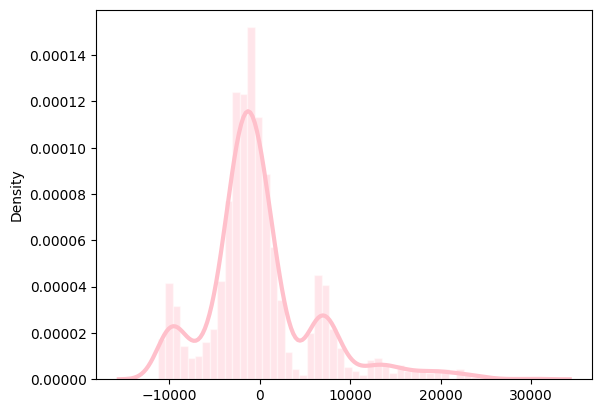

In [ ]:
#diagram normalitas
sns.distplot(residual, hist = True, kde = True,
             color = "pink",
             hist_kws = {'edgecolor':"white"},
             kde_kws = {'linewidth':3})

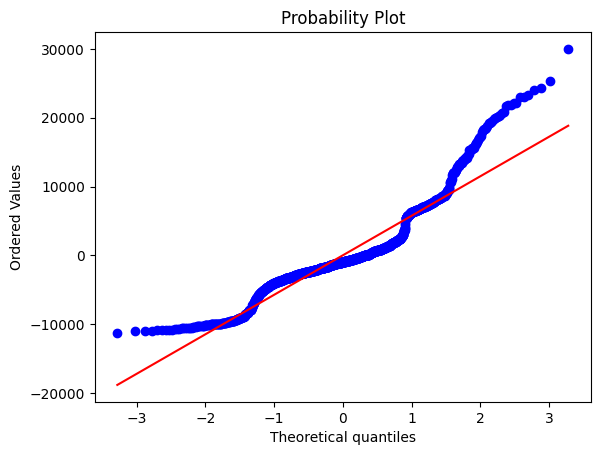

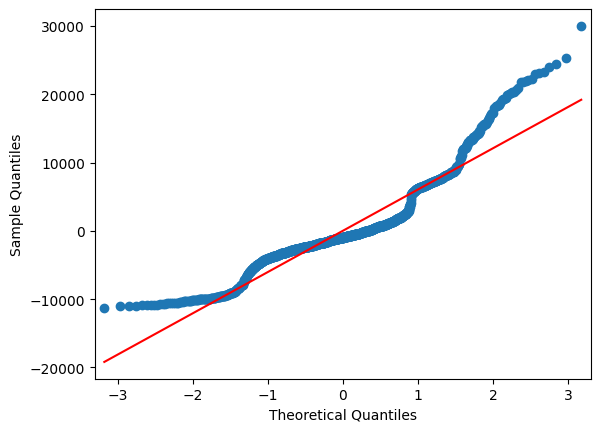

In [ ]:
# membuat q-q plot
from statsmodels.graphics.gofplots import qqplot
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()

# menggunakan statmodels
fig = sm.qqplot(residual, line='s')
plt.show()

In [ ]:
#uji autokorelasi durbin watson
# Nilai Durbin-Watson
d = sm.stats.stattools.durbin_watson(residual)
print(f'Hasil hitung Statistik Durbin-Watson: {d}')

Hasil hitung Statistik Durbin-Watson: 2.088422998667309


karena nilai durbin watson mendekati 2 maka dapat disimpulkan bahwa tidak ada auto korelasi<br>
kwtika nilai durbin 1.5-2.5 maka dikatakan tidak terdapat autokorelasi yang signifikan<br>
nilai durbin mendekati 2 maka tidak ada autokorelasi<br>
nilai durbin mendekati 0 atau 4 maka terdapat autokorelssi<br>
h0 tidak ada autokorelais<br>
h1 ada autokorelais<br>
model yang bagus adalah model yang bebas dari autokorelasi

In [ ]:
print(len(df))

1338


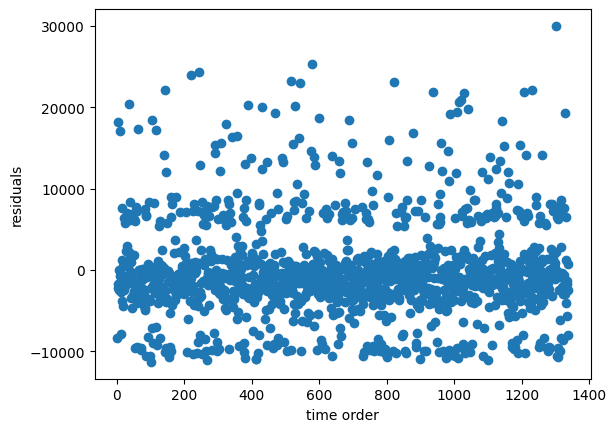

In [ ]:
# plot time vs residual
time1=list(range(1,(1338+1)))

plt.scatter(x=time1, y=residual)
plt.xlabel('time order', fontsize=10)
plt.ylabel('residuals', fontsize=10)
plt.show()

In [ ]:
#uji homoskedastisiti uji glejser
glejser = sm.OLS(abs(residual), X_dummy).fit()

#df_glejser = pd.DataFrame(glejser.pvalues, columns = ['p-value'])
#df_glejser

df_glejser = pd.DataFrame(glejser.pvalues, columns = ['p-value'])
df_glejser['Keputusan'] = df_glejser['p-value'].gt(0.05)
df_glejser['Keputusan'] = df_glejser['Keputusan'].replace({True:'Gagal Tolak H0',
                                                           False:'Tolak H0'})
df_glejser

,p-value,Keputusan
const,8.326576e-06,Tolak H0
usia,5.726378e-01,Gagal Tolak H0
imt,2.491215e-09,Tolak H0
anak,2.896985e-01,Gagal Tolak H0
jenis kelamin_pria,8.310203e-04,Tolak H0
jenis kelamin_wanita,1.972383e-04,Tolak H0
merokok_tidak,1.373672e-34,Tolak H0
merokok_ya,6.097544e-62,Tolak H0
wilayah_wilayah 1,8.720190e-01,Gagal Tolak H0
wilayah_wilayah 2,7.296683e-02,Gagal Tolak H0


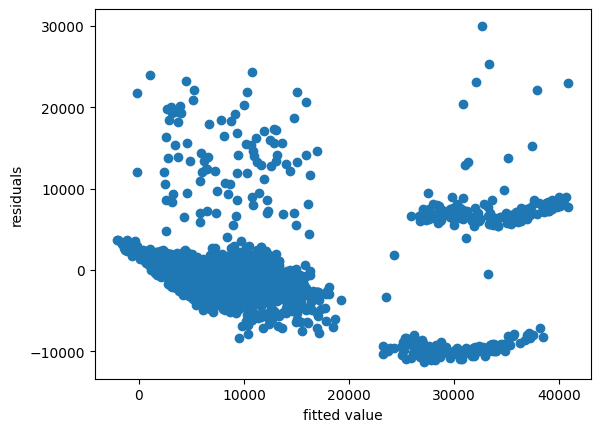

In [ ]:
# plot residual vs predict value
plt.scatter(x=result_dummy.predict(X_dummy), y=residual) # x bisa pakai result.fittedvalues hasilnya sama
plt.xlabel('fitted value', fontsize=10)
plt.ylabel('residuals', fontsize=10)
plt.show()

h0 variansi eror konstan (homo)<br>
h1 variansi eror tidak konstan (hetero) <br>


*   jika titik titik tidak membentuk pita atau corong maka tidak ada kelainan(abnormal)
*   jika titik titik berbentuk corong artinya lebar pita meningkat, artinya variansi eror cenderung meningkat dengan peningkatan respon
- jika membentuk pola sistematis misal melengkung maka diduga model tersebut tidak memadai dan bisa jadi dicoba dengan model kuadratik atau non lineran lainnya



In [ ]:
df_onehot = df_baru.copy()
df_onehot = pd.get_dummies(df_onehot).astype('int')
df_onehot.head()

,usia,imt,anak,biaya,jenis kelamin_pria,jenis kelamin_wanita,merokok_tidak,merokok_ya,wilayah_wilayah 1,wilayah_wilayah 2,wilayah_wilayah 3,wilayah_wilayah 4
0,19,27,0,16884,0,1,0,1,1,0,0,0
1,18,33,1,1725,1,0,1,0,0,1,0,0
2,28,33,3,4449,1,0,1,0,0,1,0,0
3,33,22,0,21984,1,0,1,0,0,0,1,0
4,32,28,0,3866,1,0,1,0,0,0,1,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_onehot[['usia','jenis kelamin_pria','jenis kelamin_wanita','imt','anak','merokok_tidak','merokok_ya','wilayah_wilayah 1','wilayah_wilayah 2','wilayah_wilayah 3','wilayah_wilayah 4','biaya']]
Y = df_onehot['biaya']
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                 feature       VIF
0                   usia  1.373454
1     jenis kelamin_pria       inf
2   jenis kelamin_wanita       inf
3                    imt  1.224980
4                   anak  1.013068
5          merokok_tidak       inf
6             merokok_ya       inf
7      wilayah_wilayah 1       inf
8      wilayah_wilayah 2       inf
9      wilayah_wilayah 3       inf
10     wilayah_wilayah 4       inf
11                 biaya  4.014175


nilai nilai VIF<10 maka tidak terjadi multiko

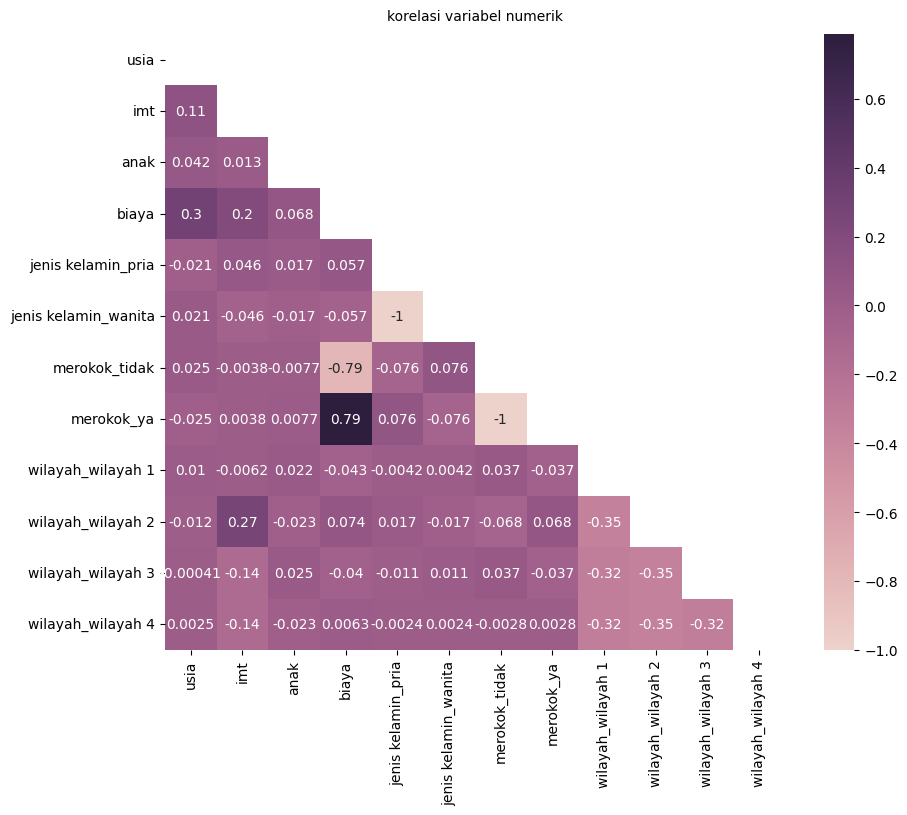

In [ ]:
corr = df_baru_dummy.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, annot=True)
plt.title('korelasi variabel numerik', fontsize=10, pad=10)
plt.show()

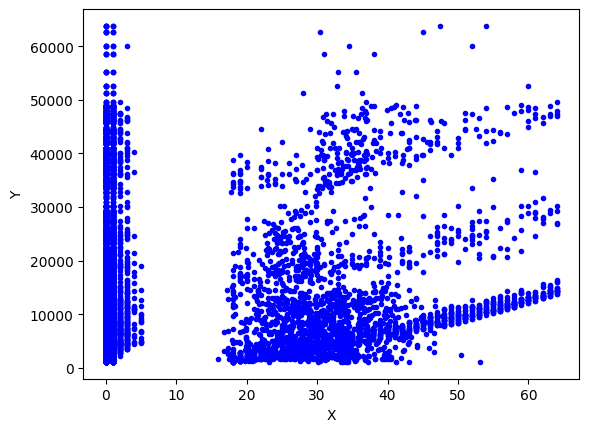

In [ ]:
plt.plot(x_dummy, y_dummy, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.7449415564623686


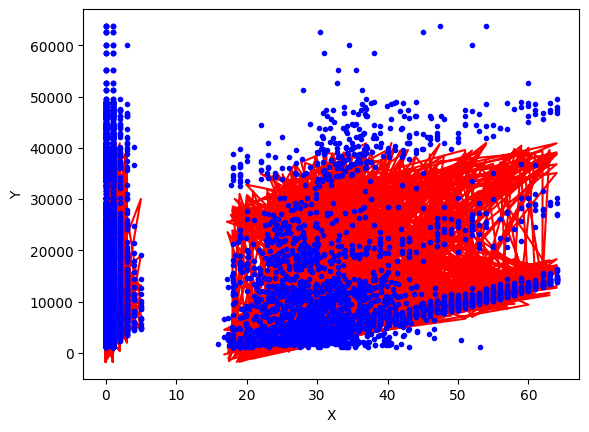

In [ ]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(x_dummy, y_dummy, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8464596141402422


Berdasarkan hasil nilai  R2  yang didapatkan, dapat diketahui bahwa dengan menggunakan regresi linear didapat kan nilai  R2  sebesar 74,5% sedangkan saat menggunakan model regresi polinomial, sebesar 85%. Sehingga, dapat disimpulkan bahwa model regresi polinomial sudah sesuai dengan data yg digunakan.

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[-1.14077037e+14 -3.41129241e+01  2.38411104e+02  8.04070242e+02
 -1.40714023e+01  1.40714023e+01  3.34692432e+03 -3.34692432e+03
  1.17409025e+02  4.48638877e+02 -5.58351241e+02 -7.69666188e+00
  3.64271288e+00  1.77593772e+00 -1.83877129e+01 -1.04194676e+01
 -2.36934564e+01 -1.04926186e+01 -2.36203054e+01  2.38767272e+01
  1.08349670e+01 -2.16744456e+01 -4.71501726e+01  2.29253710e+00
 -1.83908188e+01  1.06456313e+02  1.31954791e+02 -5.88605911e+02
  8.27017016e+02  6.47226080e+00 -1.10272268e+01  1.19299966e+02
  1.23666104e+02  4.09750912e+01  2.66236971e+02  5.37833271e+02
  6.00456435e+02  2.03613807e+02 -1.88054733e+02 -1.75579384e+02
  5.17331781e+02  6.50372578e+02 -1.40714023e+01  0.00000000e+00
  1.82643059e+03 -1.84050200e+03 -3.61705458e+02  2.74715765e+02
 -3.80563118e+02  4.53481409e+02  1.40714023e+01  1.52049372e+03
 -1.50642232e+03  4.79114483e+02  1.73923112e+02 -1.77788123e+02
 -4.61178070e+02  3.34692432e+03  0.00000000e+00  6.27813044e+02
  1.28235964e+03  8.70961

garis lurur linear, melengkung kuadratik, melengkung 2 kubik

In [ ]:
from sklearn.model_selection import train_test_split

#mengatur data train dan data test dengan rasio 7:3
x_train, x_test, y_train, y_test = train_test_split(x_dummy,y_dummy,test_size = 0.3,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

#memanggil fungsi untuk membuat regresi linier
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)   #sampai sini sudah bisa memprediski

LinearRegression()

In [ ]:
y_pred_train = lr.predict(x_train)

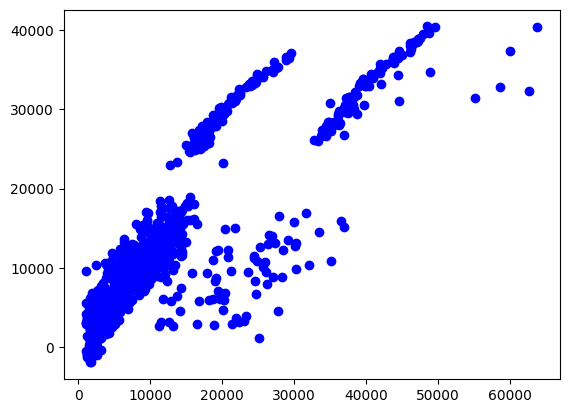

In [ ]:
import matplotlib.pyplot as plt

#membuat scatter plot dari data train
plt.scatter(y_train, y_pred_train, color = 'b')
plt.show() #menunjukkan scatter plot

In [ ]:
prediksi = {'usia':[40], 'imt':[20],
            'anak':[3], 'jenis kelamin_pria':[1],
            'jenis kelamin_wanita':[0], 'merokok_tidak':[1],
            'merokok_ya':[0], 'wilayah_wilayah 1':[1], 'wilayah_wilayah 2':[0],
            'wilayah_wilayah 3':[0], 'wilayah_wilayah 4':[0]
            }
data = pd.DataFrame(prediksi)
data

,usia,imt,anak,jenis kelamin_pria,jenis kelamin_wanita,merokok_tidak,merokok_ya,wilayah_wilayah 1,wilayah_wilayah 2,wilayah_wilayah 3,wilayah_wilayah 4
0,40,20,3,1,0,1,0,1,0,0,0


In [ ]:
prediksi_baru = lr.predict(data) #memprediksi dengan memanggil fungsi predict
prediksi_baru

array([5700.62332014])

In [ ]:
#uji logistik
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
my_list = []
#cm = confusion_matrix(y_test, y_pred)
acc_logreg = accuracy_score(y_test, y_pred)
my_list.append(acc_logreg)
#print(cm)
print(acc_logreg, '%')

ValueError: continuous is not supported